## LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c7cb76d2f748c5c9451b759fda5ff2a4ef6ee7399eb56af0e7842c2baf674b31
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
diabetes = pd.read_csv("diabetes.csv")
X = diabetes.drop(columns='Outcome')
y = diabetes['Outcome']

In [ ]:
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI         Age     Outcome  
count  768.000000  768.000000  768.000000  
mean    31.992578   33.240885    0.348958  
std      7.884160   11.760232    0.476951  
min      0.000000   21.000000    0.000000  
25%     27.300000   24.000000    0.000000  
50%     32.000000   29.000000    0.000000  
75%     36.600000   41.000000    1.000000  
max     67.100000   81.000000    1.000000

In [ ]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  \
0            6      148             72             35        0  33.6   50   
1            1       85             66             29        0  26.6   31   
2            8      183             64              0        0  23.3   32   
3            1       89             66             23       94  28.1   21   
4            0      137             40             35      168  43.1   33   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Age            768 non-null    int64  
 7   Outcome        768 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 48.1 KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

RandomForestClassifier()

In [ ]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(np.array(X),
                                              mode = "classification",
                                              class_names = ["No Diabetes", "Diabetes"],
                                              feature_names = X.columns)
explainer

In [ ]:
idx = 1
print("Actual Label :", y.iloc[idx])
print("Predicted Label :",rf_model.predict(X[idx:idx+1]) )
explanation = explainer.explain_instance(X.iloc[idx], rf_model.predict_proba,num_features = len(X.iloc[idx]))
explanation.show_in_notebook()

Actual Label : 0
Predicted Label : [0]


In [ ]:
import warnings
warnings.filterwarnings('ignore')
explanation = explainer.explain_instance(X.iloc[idx], rf_model.predict_proba,num_features = len(X.iloc[idx]))
explanation.show_in_notebook()

In [ ]:
[-2.32195506e-01 -2.02904957e-01  6.20868314e-02 -4.32722614e-02
 -9.60418065e-03 -2.02692655e-03  8.85334118e-05]

In [ ]:
explanation.as_list()

[('Glucose <= 99.00', -0.22667907221908765),
 ('BMI <= 27.30', -0.1940281974378802),
 ('29.00 < Age <= 41.00', 0.07142054141529616),
 ('Pregnancies <= 1.00', -0.029693336131125937),
 ('62.00 < BloodPressure <= 72.00', -0.013223162817883705),
 ('Insulin <= 0.00', -0.006875813652276533),
 ('23.00 < SkinThickness <= 32.00', -0.004185991366882963)]

### LIME Manual - Random forest

In [ ]:
!pip install pyDOE2
!pip install scikit-learn

In [ ]:
import collections
import copy
from functools import partial
import json
import warnings

import numpy as np
import scipy as sp
import sklearn
import sklearn.preprocessing
from sklearn.utils import check_random_state
from pyDOE2 import lhs
from scipy.stats.distributions import norm

from lime.discretize import QuartileDiscretizer
from lime.discretize import DecileDiscretizer
from lime.discretize import EntropyDiscretizer
from lime.discretize import BaseDiscretizer
from lime.discretize import StatsDiscretizer
from lime import explanation
from lime import lime_base

In [ ]:
training_data = np.array(X)
mode="classification"
training_labels=None
feature_names=X.columns
categorical_features=None
categorical_names=None
kernel_width=None
kernel=None
verbose=False
class_names=["No Diabetes", "Diabetes"]
feature_selection='auto'
discretize_continuous=True
discretizer='quartile'
sample_around_instance=False
random_state=None
training_data_stats=None
feature_values = {}
random_state = check_random_state(random_state)
mode = mode
categorical_names = categorical_names or {}
sample_around_instance = sample_around_instance
training_data_stats = training_data_stats



In [ ]:
def convert_and_round(values):
    return ['%.2f' % v for v in values]


def validate_training_data_stats(training_data_stats):
    stat_keys = list(training_data_stats.keys())
    valid_stat_keys = ["means", "mins", "maxs", "stds", "feature_values", "feature_frequencies"]
    missing_keys = list(set(valid_stat_keys) - set(stat_keys))
    if len(missing_keys) > 0:
        raise Exception("Missing keys in training_data_stats. Details: %s" % (missing_keys))


# Check and raise proper error in stats are supplied in non-descritized path
if training_data_stats:
    validate_training_data_stats(training_data_stats)

if categorical_features is None:
    categorical_features = []
if feature_names is None:
    feature_names = [str(i) for i in range(training_data.shape[1])]

categorical_features = list(categorical_features)
feature_names = list(feature_names)


if discretize_continuous and not sp.sparse.issparse(training_data):
    if training_data_stats:
        discretizer = StatsDiscretizer(
            training_data, categorical_features,
            feature_names, labels=training_labels,
            data_stats=training_data_stats,
            random_state=random_state)
        print("vdfvfd", discretizer)

    if discretizer == 'quartile':
        discretizer = QuartileDiscretizer(
                training_data, categorical_features,
                feature_names, labels=training_labels,
                random_state=random_state)
        print(discretizer)

    elif discretizer == 'decile':
        discretizer = DecileDiscretizer(
                training_data, categorical_features,
                feature_names, labels=training_labels,
                random_state=random_state)
    elif discretizer == 'entropy':
        discretizer = EntropyDiscretizer(
                training_data, categorical_features,
                feature_names, labels=training_labels,
                random_state=random_state)
    elif isinstance(discretizer, BaseDiscretizer):
        discretizer = discretizer
    else:
        raise ValueError('''Discretizer must be 'quartile',''' +
                            ''' 'decile', 'entropy' or a''' +
                            ''' BaseDiscretizer instance''')
    categorical_features = list(range(training_data.shape[1]))

    # Get the discretized_training_data when the stats are not provided
    if(training_data_stats is None):
        discretized_training_data = discretizer.discretize(
            training_data)

# if kernel_width is None:
#     kernel_width = np.sqrt(training_data.shape[1]) * .75
# kernel_width = float(kernel_width)

# if kernel is None:
#     def kernel(d, kernel_width):
#         return np.sqrt(np.exp(-(d * 2) / kernel_width * 2))

# kernel_fn = partial(kernel, kernel_width=kernel_width)

# feature_selection = feature_selection
# base = lime_base.LimeBase(kernel_fn, verbose, random_state=random_state)
# class_names = class_names

# Though set has no role to play if training data stats are provided
scaler = sklearn.preprocessing.StandardScaler(with_mean=False)
scaler.fit(training_data)
feature_values = {}
feature_frequencies = {}

for feature in categorical_features:
    if training_data_stats is None:
        if discretizer is not None:
            column = discretized_training_data[:, feature]
        else:
            column = training_data[:, feature]

        feature_count = collections.Counter(column)
        values, frequencies = map(list, zip(*(sorted(feature_count.items()))))
    else:
        values = training_data_stats["feature_values"][feature]
        frequencies = training_data_stats["feature_frequencies"][feature]

    feature_values[feature] = values
    feature_frequencies[feature] = (np.array(frequencies) /
                                            float(sum(frequencies)))
    scaler.mean_[feature] = 0
    scaler.scale_[feature] = 1


In [ ]:
discretized_training_data

array([[2., 3., 1., ..., 0., 2., 3.],
       [0., 0., 1., ..., 0., 0., 2.],
       [3., 3., 1., ..., 0., 0., 2.],
       ...,
       [2., 2., 1., ..., 2., 0., 2.],
       [0., 2., 0., ..., 0., 1., 3.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
def __data_inverse(data_row,
                  num_samples,
                  sampling_method):

    is_sparse = sp.sparse.issparse(data_row)
    if is_sparse:
        num_cols = data_row.shape[1]
        # print(num_cols,num_samples)
        data = sp.sparse.csr_matrix((num_samples, num_cols), dtype=data_row.dtype)
    else:
        num_cols = data_row.shape[0]
        # print(num_cols,num_samples)
        data = np.zeros((num_samples, num_cols))
    categorical_features = range(num_cols)

    if discretizer is None:
        instance_sample = data_row
        scale = scaler.scale_
        mean = scaler.mean_
        if is_sparse:
            # Perturb only the non-zero values
            non_zero_indexes = data_row.nonzero()[1]
            num_cols = len(non_zero_indexes)
            instance_sample = data_row[:, non_zero_indexes]
            scale = scale[non_zero_indexes]
            mean = mean[non_zero_indexes]

        if sampling_method == 'gaussian':
            data = random_state.normal(0, 1, num_samples * num_cols).reshape(num_samples, num_cols)
            data = np.array(data)
        elif sampling_method == 'lhs':
            data = lhs(num_cols, samples=num_samples
                        ).reshape(num_samples, num_cols)
            means = np.zeros(num_cols)
            stdvs = np.array([1]*num_cols)
            for i in range(num_cols):
                data[:, i] = norm(loc=means[i], scale=stdvs[i]).ppf(data[:, i])
            data = np.array(data)
        else:
            warnings.warn('''Invalid input for sampling_method.
                                Defaulting to Gaussian sampling.''', UserWarning)
            data = random_state.normal(0, 1, num_samples * num_cols
                                            ).reshape(num_samples, num_cols)
            data = np.array(data)

        if sample_around_instance:
            data = data * scale + instance_sample
        else:
            data = data * scale + mean

        if is_sparse:
            if num_cols == 0:
                data = sp.sparse.csr_matrix((num_samples,
                                                data_row.shape[1]),
                                            dtype=data_row.dtype)
            else:
                indexes = np.tile(non_zero_indexes, num_samples)
                indptr = np.array(range(0, len(non_zero_indexes) * (num_samples + 1),
                                  len(non_zero_indexes)))
                data_1d_shape = data.shape[0] * data.shape[1]
                data_1d = data.reshape(data_1d_shape)
                data = sp.sparse.csr_matrix((data_1d, indexes, indptr),
                                            shape=(num_samples, data_row.shape[1]))
        categorical_features = categorical_features
        first_row = data_row
    else:
        first_row = discretizer.discretize(data_row)
    data[0] = data_row.copy()
    inverse = data.copy()
    # print(categorical_features)
    for column in categorical_features:
        # print(column)
        values = feature_values[column]
        freqs = feature_frequencies[column]
        inverse_column = random_state.choice(values, size=num_samples,
                                                    replace=True, p=freqs)
        binary_column = (inverse_column == first_row[column]).astype(int)
        binary_column[0] = 1
        inverse_column[0] = data[0, column]
        data[:, column] = binary_column
        inverse[:, column] = inverse_column
    if discretizer is not None:
        inverse[1:] = discretizer.undiscretize(inverse[1:])
    inverse[0] = data_row
    # print("data",data)
    # print("inverse", inverse)
    return data, inverse

In [ ]:
idx = 1
perturbed_data, inverse = __data_inverse(data_row = X.iloc[idx], num_samples = 5000, sampling_method = "gaussian")

In [ ]:
data_row = X.iloc[idx]
num_samples = 5000
instance_sample = data_row
scale = scaler.scale_
mean = scaler.mean_
is_sparse = sp.sparse.issparse(data_row)
sampling_method = "gaussion"
print("sdff")

sdff


In [ ]:
if is_sparse:
    num_cols = data_row.shape[1]
    # print(num_cols,num_samples)
    data = sp.sparse.csr_matrix((num_samples, num_cols), dtype=data_row.dtype)
else:
    num_cols = data_row.shape[0]
    # print(num_cols,num_samples)
    data = np.zeros((num_samples, num_cols))
categorical_features = range(num_cols)

if is_sparse:
  print("jhj")
  # Perturb only the non-zero values
  non_zero_indexes = data_row.nonzero()[1]
  num_cols = len(non_zero_indexes)
  instance_sample = data_row[:, non_zero_indexes]
  scale = scale[non_zero_indexes]
  mean = mean[non_zero_indexes]



In [ ]:
if sampling_method == 'gaussion':
  print("nbm")
  data = random_state.normal(0, 1, num_samples * num_cols).reshape(num_samples, num_cols)
  data = np.array(data)

nbm


In [ ]:
print(len(perturbed_data))
perturbed_data[:5]

5000


array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
print(len(inverse))
inverse[:3]

5000


array([[  1.        ,  85.        ,  66.        ,  29.        ,
          0.        ,  26.6       ,  31.        ],
       [ 11.02560829, 132.87036426,  13.46512572,  13.74053536,
          0.        ,  28.56329817,  53.50100662],
       [  4.35486266, 100.59514121,  81.02471262,   0.        ,
          0.        ,  47.47342672,  23.95099493]])

In [ ]:
target = rf_model.predict_proba(inverse)
print(len(target))
target[:5]

5000


array([[0.96, 0.04],
       [0.51, 0.49],
       [0.6 , 0.4 ],
       [0.38, 0.62],
       [0.36, 0.64]])

In [ ]:
for i in range(len(inverse[:5])):
  print(inverse[i],target[i])
  print()

[ 1.  85.  66.  29.   0.  26.6 31. ] [0.96 0.04]

[ 11.02560829 132.87036426  13.46512572  13.74053536   0.
  28.56329817  53.50100662] [0.51 0.49]

[  4.35486266 100.59514121  81.02471262   0.           0.
  47.47342672  23.95099493] [0.6 0.4]

[  0.65417655 165.09708319  77.02537305  18.76763449  84.28229933
  40.4625988   48.23851559] [0.38 0.62]

[  4.26449091 144.25694678  79.09688993  53.01716429  62.24971389
  35.18394185  34.0061721 ] [0.36 0.64]



In [ ]:
scaler.scale_

array([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
scaler.mean_

array([0., 0., 0., 0., 0., 0., 0.])

In [ ]:
data = perturbed_data

if sp.sparse.issparse(data):
    # Note in sparse case we don't subtract mean since data would become dense
    scaled_data = data.multiply(scaler.scale_)
    # Multiplying with csr matrix can return a coo sparse matrix
    if not sp.sparse.isspmatrix_csr(scaled_data):
        scaled_data = scaled_data.tocsr()
else:
    scaled_data = (data - scaler.mean_) / scaler.scale_
print("Scaled_data ==> ", scaled_data)


Scaled_data ==>  [[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
print(scaled_data[:5])

[[1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
distance_metric='euclidean'

distances = sklearn.metrics.pairwise_distances(scaled_data,
                                               scaled_data[0].reshape(1, -1),
                                               metric=distance_metric).ravel()
print(len(distances))
distances

5000


array([0.        , 2.44948974, 2.44948974, ..., 2.23606798, 2.44948974,
       2.44948974])

In [ ]:
training_data = np.array(X)

kernel_width = np.sqrt(training_data.shape[1]) * .75
kernel_width = float(kernel_width)
print(kernel_width)

def kernel(d, kernel_width):
        return np.sqrt(np.exp(-(d ** 2) / kernel_width ** 2))

kernel_fn = partial(kernel, kernel_width=kernel_width)

1.984313483298443


In [ ]:
weights = kernel_fn(distances)
print("Similarity Score : ", weights)

Similarity Score :  [1.         0.46677648 0.46677648 ... 0.52997755 0.46677648 0.46677648]


In [ ]:
label = np.argsort(target[0])[-5:]
data = scaled_data
labels = target[:,label]
weights = kernel_fn(distances)
num_features = 21
method = 'highest_weights'

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0, fit_intercept=True, random_state=random_state)
used_features = []
for _ in range(min(num_features, data.shape[1])):
    max_ = -100000000
    best = 0
    for feature in range(data.shape[1]):
        if feature in used_features:
            continue
        clf.fit(data[:, used_features + [feature]], labels, sample_weight=weights)

        score = clf.score(data[:, used_features + [feature]], labels, sample_weight=weights)

        if score > max_:
            best = feature
            max_ = score
    used_features.append(best)
forward_selection = np.array(used_features)

In [ ]:
data = scaled_data
labels = target[:,label]
weights = kernel_fn(distances)

easy_model = Ridge(alpha=1, fit_intercept=True, random_state=random_state)
easy_model.fit(data[:, used_features], labels, sample_weight=weights)
local_pred = easy_model.predict(data[0, used_features].reshape(1, -1))

print('Coefficient', easy_model.coef_[0])
print()
print('Prediction_local', local_pred)

Coefficient [-2.32195506e-01 -2.02904957e-01  6.20868314e-02 -4.32722614e-02
 -9.60418065e-03 -2.02692655e-03  8.85334118e-05]

Prediction_local [[0.0698827 0.9301173]]


In [ ]:
# Manual Implementation Results
print(easy_model.coef_[0])

[-2.32195506e-01 -2.02904957e-01  6.20868314e-02 -4.32722614e-02
 -9.60418065e-03 -2.02692655e-03  8.85334118e-05]


In [ ]:
discretized_feature_names = None
discretized_feature_names = []
if discretizer is not None:
    categorical_features = range(data.shape[1])
discretized_instance = discretizer.discretize(X.iloc[1])
for f in discretizer.names:
    print(discretizer.names[f][int(discretized_instance[f])])
print()
# explanation111.as_list()

Pregnancies <= 1.00
Glucose <= 99.00
62.00 < BloodPressure <= 72.00
23.00 < SkinThickness <= 32.00
Insulin <= 0.00
BMI <= 27.30
29.00 < Age <= 41.00



In [ ]:
yss = target
class_names=["No Diabetes", "Diabetes"]
mode="classification"
training_data = np.array(X)
feature_names=X.columns
categorical_features = list(range(training_data.shape[1]))
data = perturbed_data
data_row = X.iloc[idx]
training_labels=None
random_state=None
random_state = check_random_state(random_state)

In [ ]:
if mode == "classification":
    if len(yss.shape) == 1:
        raise NotImplementedError("LIME does not currently support "
                                  "classifier models without probability "
                                  "scores. If this conflicts with your "
                                  "use case, please let us know: "
                                  "https://github.com/datascienceinc/lime/issues/16")
    elif len(yss.shape) == 2:
        if class_names is None:
            class_names = [str(x) for x in range(yss[0].shape[0])]
        else:
            class_names = list(class_names)
        if not np.allclose(yss.sum(axis=1), 1.0):
            warnings.warn("""
            Prediction probabilties do not sum to 1, and
            thus does not constitute a probability space.
            Check that you classifier outputs probabilities
            (Not log probabilities, or actual class predictions).
            """)

In [ ]:
feature_names = copy.deepcopy(feature_names)
if feature_names is None:
    feature_names = [str(x) for x in range(data_row.shape[0])]

if sp.sparse.issparse(data_row):
    values = convert_and_round(data_row.data)
    feature_indexes = data_row.indices
else:
    values = convert_and_round(data_row)
    feature_indexes = None

for i in categorical_features:
    if discretizer is not None and i in discretizer.lambdas:
        continue
    name = int(data_row[i])
    if i in categorical_names:
        name = categorical_names[i][name]
    feature_names[i] = '%s=%s' % (feature_names[i], name)
    values[i] = 'True'
categorical_features = categorical_features

In [ ]:
discretized_feature_names = None

In [ ]:
discretized_feature_names = None
discretized_feature_names = []
if discretizer is not None:
    categorical_features = range(data.shape[1])
discretized_instance = discretizer.discretize(X.iloc[111])
for f in discretizer.names:
    print(discretizer.names[f][int(discretized_instance[f])])
print()
# explanation111.as_list()

Pregnancies > 6.00
Glucose > 140.25
BloodPressure <= 62.00
23.00 < SkinThickness <= 32.00
Insulin > 127.25
32.00 < BMI <= 36.60
Age > 41.00



## SHAP - Random forest

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.2 MB/s eta 0:00:00


In [ ]:
# Load useful libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import shap

In [ ]:
diabetes = pd.read_csv("diabetes.csv")

In [ ]:
# Separate Features and Target Variables
X = diabetes.drop(columns='Outcome')
y = diabetes['Outcome']

# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                	stratify =y,
                                                	random_state = 13)


In [ ]:
# Build the model
rf_model = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)
rf_model.fit(X, y)


RandomForestClassifier(max_features=2)

In [ ]:
# Create the explainer
explainer = shap.TreeExplainer(rf_model)

In [ ]:
shap_values = explainer.shap_values(X)

In [ ]:
idx = 1
print("Actual prediction : ", y.iloc[idx])
print("Model's prediction : ", rf_model.predict(X[idx:idx+1])[0])

shap.initjs()
shap.force_plot(explainer.expected_value[1],
                shap_values[idx][:,1],
                X.iloc[idx])

Actual prediction :  0
Model's prediction :  0


In [ ]:
shap_values = explainer(X)

In [ ]:
shap_values = explainer(X)
shap_values[1]

.values =
array([[ 0.04468168, -0.04468168],
       [ 0.17834136, -0.17834136],
       [ 0.00915164, -0.00915164],
       [ 0.0057639 , -0.0057639 ],
       [ 0.02545751, -0.02545751],
       [ 0.10458302, -0.10458302],
       [-0.05200256,  0.05200256]])

.base_values =
array([0.65402344, 0.34597656])

.data =
array([ 1. , 85. , 66. , 29. ,  0. , 26.6, 31. ])

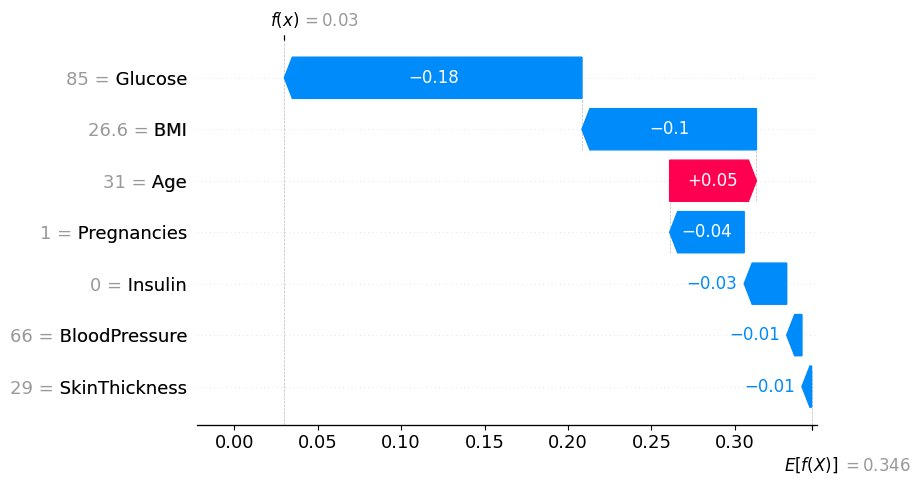

In [ ]:
idx = 1
shap.plots.waterfall(shap_values[idx][:,1],max_display=len(X))

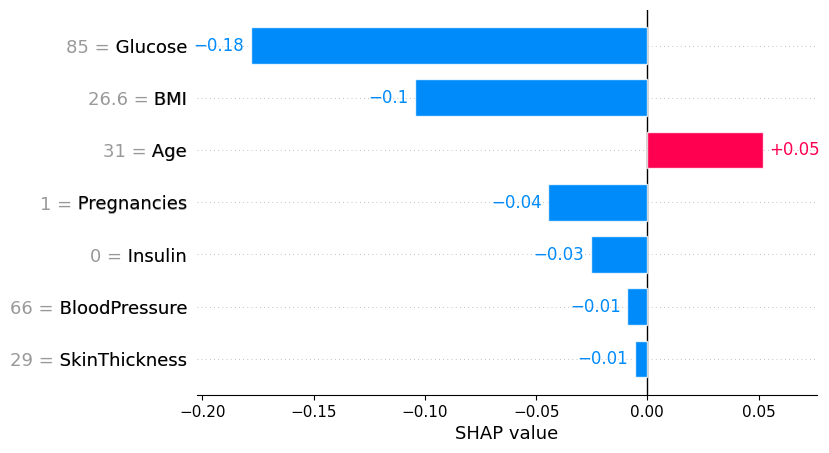

In [ ]:
idx = 1
shap.plots.bar(shap_values[idx][:,1])

### SHAP Manual- Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

data = np.array(X)
mean = np.array(np.mean(data, 0)).flatten()
coef = lr_model.coef_
intercept = lr_model.intercept_
# feature_perturbation == "correlation_dependent"
feature_perturbation = "interventional"

# valid_inds = np.where(np.diag(cov) > 1e-8)[0]
from scipy.sparse import issparse

In [ ]:
explainer1 = shap.Explainer(model = lr_model,masker = X)
explainer1

In [ ]:
shap_values = explainer1.shap_values(X)

In [ ]:
data = np.array(X)
data

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [ ]:
## Manual Calculation
def calculate_expected_value(model, X_data):
    data = np.array(X_data)
    mean = np.array(np.mean(data, 0)).flatten()
    coef = model.coef_
    intercept = model.intercept_
    expected_value = np.dot(coef, mean) + intercept

    return expected_value

calculate_expected_value(lr_model, X)

0.35057906645104076

In [ ]:
explainer1 = shap.Explainer(model = lr_model,masker = X)
explainer1.expected_value

0.3517459066104941

In [ ]:
def shapley_values(X):
    # convert dataframes
    if isinstance(X, (pd.Series, pd.DataFrame)):
        X = X.values

    if feature_perturbation == "interventional":
      if issparse(X):
          if len(coef.shape) == 1:
              return np.array(np.multiply(X - mean, coef))
          else:
              return np.stack([np.array(np.multiply(X - mean, coef[i])) for i in range(coef.shape[0])], axis=-1)
      else:
          if len(coef.shape) == 1:
              return np.array(X - mean) * coef
          else:
              return np.stack([np.array(X - mean) * coef[i] for i in range(coef.shape[0])], axis=-1)

shapley_values(X)[1]

array([-0.04436567, -0.21323514,  0.00808342,  0.01400889,  0.01689393,
       -0.07013148, -0.00825457])

In [ ]:
shapley_values = shapley_values(X)
shapley_values[1]

array([-0.04436567, -0.21323514,  0.00808342,  0.01400889,  0.01689393,
       -0.07013148, -0.00825457])

In [ ]:
shap_values = explainer1(X)
shap_values[1]

.values =
array([-0.04210374, -0.22211912,  0.00681976,  0.01387061,  0.0147029 ,
       -0.06484385, -0.00449401])

.base_values =
0.3517459066104941

.data =
array([ 1. , 85. , 66. , 29. ,  0. , 26.6, 31. ])

In [ ]:
idx = 1
print("Actual prediction : ", y.iloc[idx])
print("Model's prediction : ", lr_model.predict(X[idx:idx+1])[0])

shap.initjs()
shap.force_plot(explainer1.expected_value,
                shap_values[idx],
                X.iloc[idx])

Actual prediction :  0
Model's prediction :  0.053578448249655186


Actual prediction :  0
Model's prediction :  0.053578448249655186


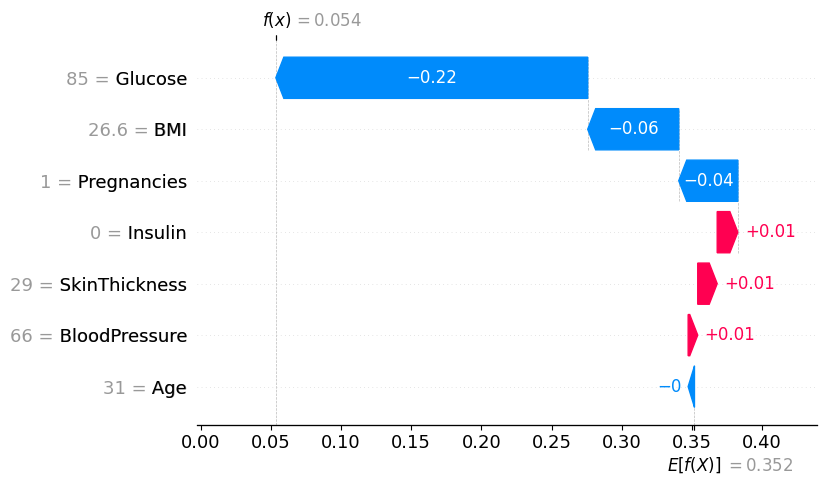

In [ ]:
idx = 1
print("Actual prediction : ", y.iloc[idx])
print("Model's prediction : ", lr_model.predict(X[idx:idx+1])[0])

shap_values = explainer(X)
shap.plots.waterfall(shap_values[idx],max_display=len(X))

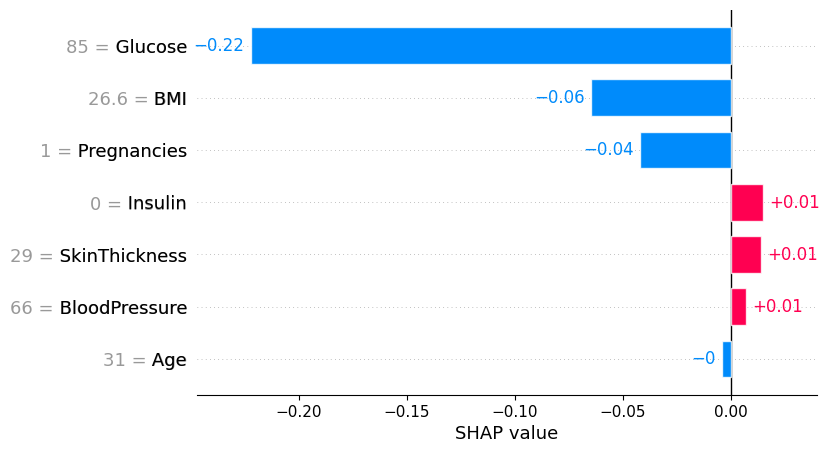

In [ ]:
idx = 1
shap.plots.bar(shap_values[idx])

# Random Forest Classifier

In [ ]:
import numpy as np
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import shap

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [ ]:
# Select an instance for explanation
instance = X[0:1]

# Generate all possible coalitions
def generate_coalitions(num_features):
    coalitions = []
    for i in range(num_features + 1):
        for combo in combinations(range(num_features), i):
            coalition = [1 if j in combo else 0 for j in range(num_features)]
            coalitions.append(coalition)
    return np.array(coalitions)

# Define the number of features
num_features = X.shape[1]

# Generate coalitions
coalitions = generate_coalitions(num_features)

# Background data for baseline values
background_data = X

def compute_model_output_for_coalition(model, coalition, instance, background_data):
    """
    Compute the model output for a given coalition.
    :param model: Trained model
    :param coalition: Binary vector indicating included features
    :param instance: Instance to explain
    :param background_data: Background data for marginal distribution
    :return: Model prediction for the coalition
    """
    # Create a copy of the instance with only the included features
    instance_coalition = instance.copy()
    for i in range(len(coalition)):
        if coalition[i] == 0:
            # Replace excluded feature with the mean of the feature from background data
            instance_coalition[0, i] = background_data[:, i].mean()

    # Predict using the model
    return model.predict_proba(instance_coalition)[0]

# Compute model outputs for each coalition
predictions = []
for coalition in coalitions:
    prediction = compute_model_output_for_coalition(model, coalition, instance, background_data)
    predictions.append(prediction)

# Compute marginal contributions for each feature
def compute_marginal_contributions(coalitions, predictions):
    num_features = coalitions.shape[1]
    num_classes = predictions[0].shape[0]
    contributions = np.zeros((num_features, num_classes))

    for i in range(num_features):
        for j, coalition in enumerate(coalitions):
            if coalition[i] == 1:  # Feature is included in the coalition
                # Find the coalition with the same features except the i-th feature excluded
                coalition_excluded = coalition.copy()
                coalition_excluded[i] = 0
                try:
                    idx_excluded = next(idx for idx, c in enumerate(coalitions) if np.array_equal(c, coalition_excluded))
                    marginal_contribution = predictions[j] - predictions[idx_excluded]
                    contributions[i] += marginal_contribution
                except StopIteration:
                    # If there is no matching coalition with the excluded feature, skip
                    continue

    # Average the contributions
    contributions /= len(coalitions)
    return contributions

# Compute SHAP values (marginal contributions)
shap_values_manual = compute_marginal_contributions(coalitions, predictions)

# Print the SHAP values from manual calculation for each class (Iris dataset has 3 classes)
for i in range(shap_values_manual.shape[1]):
    print(f"Manual SHAP values for class {i}: {shap_values_manual[:, i]}")


Manual SHAP values for class 0: [0.0125 0.005  0.2575 0.225 ]
Manual SHAP values for class 1: [-0.0125 -0.005  -0.2575 -0.225 ]
Manual SHAP values for class 2: [0. 0. 0. 0.]


In [ ]:
instance = X[0:1]
instance

array([[5.1, 3.5, 1.4, 0.2]])

In [ ]:
instance = X[0:1]

# Using SHAP library to compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(instance)
shap_values

array([[[ 0.03874168, -0.00642387, -0.03231781],
        [ 0.01046831, -0.00179136, -0.00867695],
        [ 0.32623621, -0.17747883, -0.14875738],
        [ 0.28708714, -0.14763927, -0.13944787]]])

### Manual Interpretation

In [ ]:
data = X
masker = data
data_missing = None if data is None else pd.isna(data)
feature_names = None
len(data)

150

In [ ]:
shap.explainers._explainer.Explainer(model, masker, feature_names=feature_names)

In [ ]:
from shap.explainers._tree import TreeEnsemble

model_output = 'raw'
expected_value = None
model = TreeEnsemble(model, data, data_missing, model_output)
model

In [ ]:
tree_limit=None
# see if we have a default tree_limit in place.
if tree_limit is None:
    tree_limit = -1 if model.tree_limit is None else model.tree_limit

tree_limit

-1

In [ ]:
feature_perturbation="interventional"
check_additivity = True

In [ ]:
model.model_type

'internal'

In [ ]:
model.model_output

'raw'

In [ ]:
def _validate_inputs(X, y, tree_limit, check_additivity):
    # see if we have a default tree_limit in place.
    if tree_limit is None:
        tree_limit = -1 if model.tree_limit is None else model.tree_limit
    if tree_limit < 0 or tree_limit > model.values.shape[0]:
        tree_limit = model.values.shape[0]
    # convert dataframes
    if isinstance(X, (pd.Series, pd.DataFrame)):
        X = X.values
    flat_output = False
    if len(X.shape) == 1:
        flat_output = True
        X = X.reshape(1, X.shape[0])
    if X.dtype != model.input_dtype:
        X = X.astype(model.input_dtype)
    X_missing = np.isnan(X, dtype=bool)
    assert isinstance(X, np.ndarray), "Unknown instance type: " + str(type(X))
    assert len(X.shape) == 2, "Passed input data matrix X must have 1 or 2 dimensions!"

    return X, y, X_missing, flat_output, tree_limit, check_additivity

X, y, X_missing, flat_output, tree_limit, check_additivity = _validate_inputs(X, y, tree_limit, check_additivity)

X, y, X_missing, flat_output, tree_limit, check_additivity

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
print(flat_output)

False


In [ ]:
transform = model.get_transform()
transform

'identity'

In [ ]:
shap.explainers._tree._xgboost_cat_unsupported(model)

In [ ]:
len(X)

150

In [ ]:
from shap.utils import assert_import
# run the core algorithm using the C extension
assert_import("cext")
phi = np.zeros((X.shape[0], X.shape[1]+1, model.num_outputs))
phi

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
from shap import _cext
feature_perturbation_codes = {"interventional": 0,
                              "tree_path_dependent": 1,
                              "global_path_dependent": 2,
                              }
output_transform_codes = {"identity": 0,
                          "logistic": 1,
                          "logistic_nlogloss": 2,
                          "squared_loss": 3,
                         }

_cext.dense_tree_shap(model.children_left, model.children_right, model.children_default,
                      model.features, model.thresholds, model.values, model.node_sample_weight,
                      model.max_depth, X, X_missing, y, data, data_missing, tree_limit,
                      model.base_offset, phi, feature_perturbation_codes[feature_perturbation],
                      output_transform_codes[transform], False
                      )

0.0033333333333333335

In [ ]:
print("hi how are you")

hi how are you


In [ ]:
_cext.dense_tree_saabas(
                model.children_left, model.children_right, model.children_default,
                model.features, model.thresholds, model.values,
                model.max_depth, tree_limit, model.base_offset, output_transform_codes[transform],
                X, X_missing, y, phi
            )

0.0033333333333333335

In [ ]:
phi[0]

array([[ 0.06870465, -0.01489519, -0.05380946],
       [ 0.01496609, -0.00386259, -0.0111035 ],
       [ 0.65470054, -0.34133369, -0.31336685],
       [ 0.5944287 , -0.31277519, -0.28165352],
       [ 0.33359999,  0.33686666,  0.32953333]])

In [ ]:
phi

array([[[ 1.35555551e-02,  6.48333331e-03, -2.00388884e-02],
        [ 1.02333331e-02, -1.49999822e-04, -1.00833334e-02],
        [ 3.37944437e-01, -1.74527774e-01, -1.63416664e-01],
        [ 3.04666660e-01, -1.68672219e-01, -1.35994443e-01],
        [ 3.33599993e-01,  3.36866659e-01,  3.29533326e-01]],

       [[ 2.68222216e-02, -3.23666657e-02,  5.54444458e-03],
        [-2.03333331e-03,  3.33333241e-04,  1.70000004e-03],
        [ 3.37477770e-01, -1.63799996e-01, -1.73677774e-01],
        [ 3.04133327e-01, -1.41033330e-01, -1.63099997e-01],
        [ 3.33599993e-01,  3.36866659e-01,  3.29533326e-01]],

       [[ 2.29777773e-02, -2.85222214e-02,  5.54444457e-03],
        [ 9.55555410e-04,  8.26666661e-03, -9.22222226e-03],
        [ 3.37477770e-01, -1.64366663e-01, -1.73111108e-01],
        [ 3.04988882e-01, -1.52244441e-01, -1.52744442e-01],
        [ 3.33599993e-01,  3.36866659e-01,  3.29533326e-01]],

       ...,

       [[-1.04555552e-02, -1.57222223e-02,  2.61777770e-02],
     

In [ ]:
expected_value = None
def _get_shap_output(phi, flat_output):
    if model.model_output != "log_loss":
        expected_value = [phi[0, -1, i] for i in range(phi.shape[2])]
    if flat_output:
        out = [phi[0, :-1, i] for i in range(model.num_outputs)]
    else:
        out = [phi[:, :-1, i] for i in range(model.num_outputs)]

    return out

In [ ]:
expected_value = [phi[0, -1, i] for i in range(phi.shape[2])]
expected_value

[0.33359999254345896, 0.3368666591371099, 0.32953332596768936]

In [ ]:
out = _get_shap_output(phi, flat_output)
len(out[1])

150

In [ ]:
if isinstance(out, list):
    out = np.stack(out, axis=-1)

In [ ]:
out[0]

array([[ 0.06870465, -0.01489519, -0.05380946],
       [ 0.01496609, -0.00386259, -0.0111035 ],
       [ 0.65470054, -0.34133369, -0.31336685],
       [ 0.5944287 , -0.31277519, -0.28165352]])

In [ ]:
shap_values

array([[[ 0.03874168, -0.00642387, -0.03231781],
        [ 0.01046831, -0.00179136, -0.00867695],
        [ 0.32623621, -0.17747883, -0.14875738],
        [ 0.28708714, -0.14763927, -0.13944787]]])

In [ ]:
shap_values = explainer.shap_values(X[3])
print(shap_values)
out[3]

[[ 0.04686842 -0.0328129  -0.01405552]
 [ 0.00268442 -0.00064194 -0.00204249]
 [ 0.32584732 -0.16683572 -0.15901159]
 [ 0.28713317 -0.13304277 -0.1540904 ]]


array([[ 0.07812687, -0.05047297, -0.0276539 ],
       [ 0.00568831, -0.00279592, -0.00289239],
       [ 0.65423387, -0.32981147, -0.3244224 ],
       [ 0.59475092, -0.2897863 , -0.30496463]])

In [ ]:
explainer.expected_value

array([0.33746667, 0.33333333, 0.3292    ])

In [ ]:
shap_values = explainer.shap_values(X[4])
print(shap_values)
out[4]

[[ 0.0393827  -0.00974844 -0.02963426]
 [ 0.00982728 -0.00111679 -0.00871049]
 [ 0.32623621 -0.17481075 -0.15142546]
 [ 0.28708714 -0.14765735 -0.13942979]]


array([[ 0.07147132, -0.02240075, -0.04907057],
       [ 0.01219943, -0.00104592, -0.0111535 ],
       [ 0.65470054, -0.33745036, -0.31725018],
       [ 0.5944287 , -0.31196963, -0.28245907]])

In [ ]:
shap_values - out[4]

array([[-3.20886138e-02,  1.26523026e-02,  1.94363110e-02],
       [-2.37214366e-03, -7.08669413e-05,  2.44301072e-03],
       [-3.28464333e-01,  1.62639612e-01,  1.65824722e-01],
       [-3.07341562e-01,  1.64312278e-01,  1.43029285e-01]])

In [ ]:
shap_values = explainer.shap_values(X[21])
print(shap_values)
out[21]

[[ 0.03590834 -0.00364956 -0.03225878]
 [ 0.01280164 -0.00407608 -0.00872556]
 [ 0.32623621 -0.17747883 -0.14875738]
 [ 0.28758714 -0.14812886 -0.13945828]]


array([[ 0.0659491 , -0.01241741, -0.05353168],
       [ 0.01721054, -0.00595148, -0.01125906],
       [ 0.65470054, -0.34133369, -0.31336685],
       [ 0.59493981, -0.31316407, -0.28177574]])

In [ ]:
shap_values - out[21]

array([[-0.03004075,  0.00876785,  0.0212729 ],
       [-0.0044089 ,  0.0018754 ,  0.0025335 ],
       [-0.32846433,  0.16385486,  0.16460947],
       [-0.30735267,  0.16503522,  0.14231746]])

In [ ]:
if flat_output:
    out1 = phi[0, :-1, :-1]
else:
    out1 = phi[:, :-1, :-1]
if isinstance(out1, list):
    out1 = np.stack(out1, axis=-1)

out1[4]

array([[ 0.07147132, -0.02240075],
       [ 0.01219943, -0.00104592],
       [ 0.65470054, -0.33745036],
       [ 0.5944287 , -0.31196963]])